In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import time
start_time = time.time()

In [3]:
file_path = 'F:\Result_TX_ARIMA.xlsx'
SN = 'Sheet1'
df = pd.read_excel(file_path, sheet_name = SN, engine = 'openpyxl')

<function matplotlib.pyplot.show(close=None, block=None)>

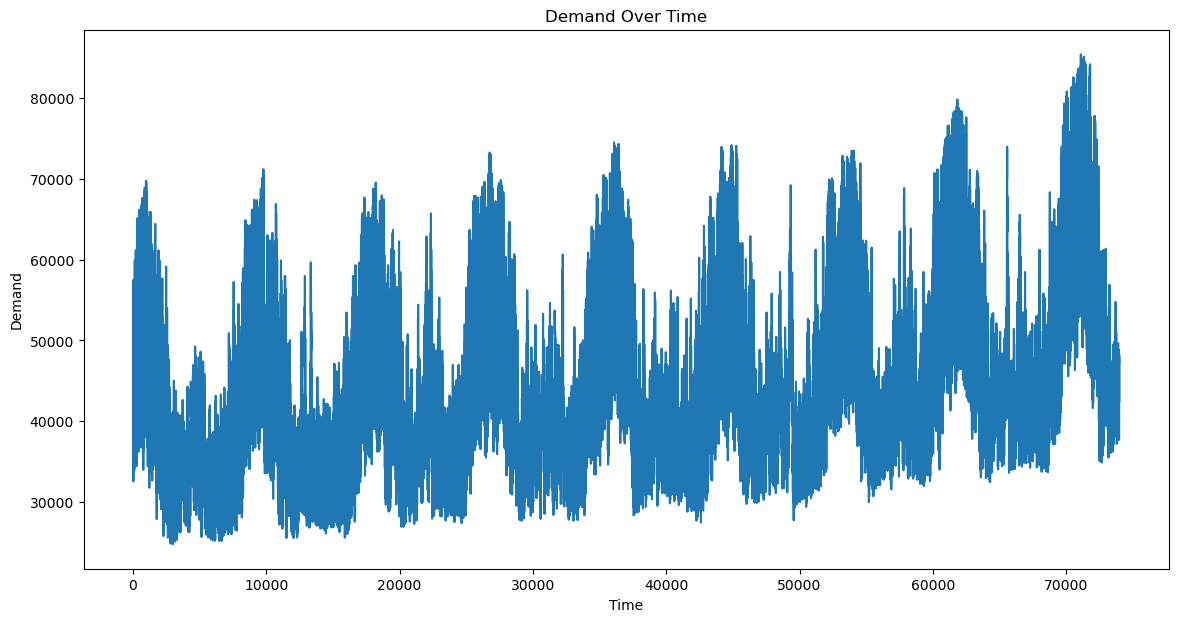

In [4]:
plt.figure(figsize=(14,7))
plt.plot(df['D'], label= 'D')
plt.title('Demand Over Time')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend
plt.show

In [5]:
adf_result = adfuller(df['D'])
print(f'ADF Statistic: {adf_result[0]}')

adf_test = adfuller(df['D'])

adf_output = pd.Series(adf_test[0:4], index =['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output['Critical Value (%s)' % key] = value
    
adf_output

ADF Statistic: -8.066731962206434


Test Statistic                -8.066732e+00
p-value                        1.588907e-12
#Lags Used                     6.300000e+01
Number of Observations Used    7.392900e+04
Critical Value (1%)           -3.430438e+00
Critical Value (5%)           -2.861579e+00
Critical Value (10%)          -2.566791e+00
dtype: float64

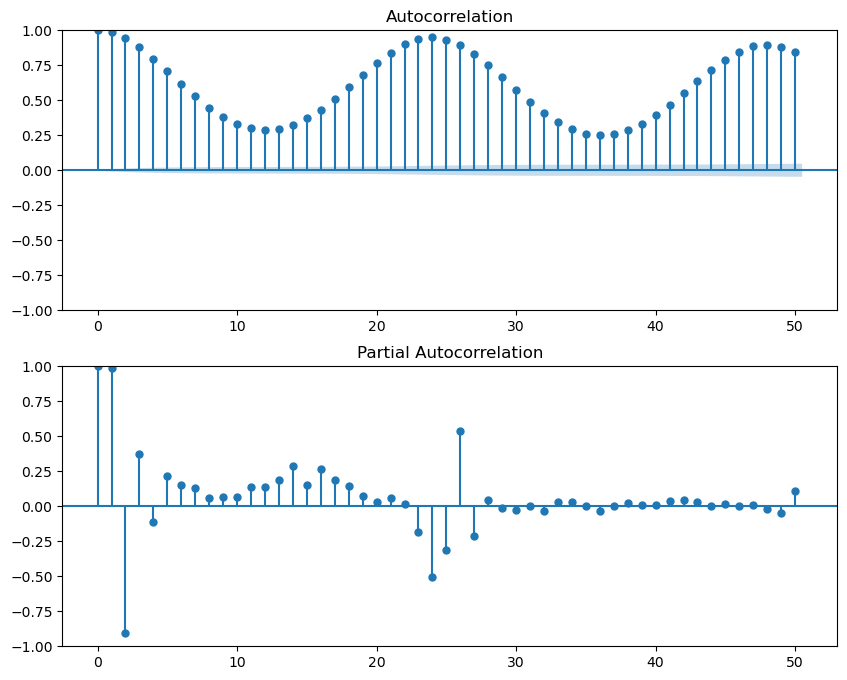

In [6]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
plot_acf(df['D'].dropna(), ax=plt.gca(), lags=50)

plt.subplot(212)
plot_pacf(df['D'].dropna(), ax=plt.gca(), lags=50, method='ywm')
plt.show()

In [7]:
YVar = df.D[0:73994]

In [7]:
df.index = pd.DatetimeIndex(df.index).to_period('H')

In [8]:
p=1
d=1
q=1
Arima_model = ARIMA(df['D'], order = (p, d, q))

In [9]:
Arima_result = Arima_model.fit()

In [10]:
model_summary = Arima_result.summary()
print(model_summary)

                               SARIMAX Results                                
Dep. Variable:                      D   No. Observations:                73993
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -593502.209
Date:                Sun, 10 Dec 2023   AIC                        1187010.418
Time:                        13:40:43   BIC                        1187038.053
Sample:                             0   HQIC                       1187018.920
                              - 73993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8127      0.001    637.768      0.000       0.810       0.815
ma.L1          0.5214      0.002    299.701      0.000       0.518       0.525
sigma2      5.384e+05   1585.817    339.514      0.0

In [11]:
predicted_value = Arima_result.predict(start=0, end=len(YVar)-1)
actual_value = YVar
r2 = r2_score(actual_value, predicted_value)
mse = mean_squared_error(actual_value, predicted_value)
rmse = sqrt(mse)
print('R-Sqaured is: ',r2)
print('Mean Sqaure Error is: ',mse)
print('Root Mean Sqaure Error is: ',rmse)
print(predicted_value)

R-Sqaured is:  0.9949264957599758
Mean Sqaure Error is:  568023.8446613699
Root Mean Sqaure Error is:  753.6735663809432
0            0.000000
1        63329.500455
2        27034.758672
3        35408.632577
4        30802.688544
             ...     
73988    49283.238673
73989    46100.985924
73990    46579.575432
73991    44686.426946
73992    42792.181135
Name: predicted_mean, Length: 73993, dtype: float64


In [12]:
results_df = pd.DataFrame({
    'Actual Value': actual_value,
    'R-Squared': r2,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse
})
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a') as writer:
    results_df.to_excel(writer, sheet_name='ARIMA Results', index=False)

In [15]:
original_df = pd.read_excel(file_path, sheet_name=SN)
original_df['Predicted_D_Arima'] = predicted_value.ravel()
updated_file_path = 'Result_TX_ARIMA.xlsx'
original_df.to_excel(file_path, index=False)

In [72]:
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")


Elapsed time: 201.11961317062378 seconds
